In [2]:
%matplotlib inline

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sqlalchemy import create_engine
conn = create_engine('sqlite:////Users/brett/Desktop/hierarchytest/stats.sqlite')

In [3]:
q = pd.read_sql_table('stats', conn)
q.set_index(['treatment_id', 'replicate_id', 'generation','kind'], inplace=True)
allc = q.unstack(-1)
allc.columns = allc.columns.levels[1]
allc.tail()

kind                                       C_1       C_2       C_3       C_4  \
treatment_id replicate_id generation                                           
1            1            59600       0.002869  0.417831  0.318569  0.677990   
                          59700       0.006422  0.411782  0.320651  0.601924   
                          59800       0.002438  0.433498  0.309268  0.495147   
                          59900       0.001748  0.427714  0.322921  0.496182   
                          60000       0.001650  0.425222  0.321396  0.515430   

kind                                       C_5       C_6       C_7       C_8  \
treatment_id replicate_id generation                                           
1            1            59600       0.141519  0.026365  0.211074  1.033648   
                          59700       0.135350  0.024763  0.219078  0.976722   
                          59800       0.142250  0.024241  0.234587  0.909881   
                          59900       0.135545  0.023243  0.239295  0.910412   
                          60000       0.143019  0.011269  0.225763  0.937917   

kind                                     C_MAX    C_MEAN    C_MXMN  F_MAX  \
treatment_id replicate_id generation                                        
1            1            59600       2.456436  2.829865  1.033648      1   
                          59700       2.456436  2.696691  0.976722      1   
                          59800       1.977399  2.551309  0.909881      1   
                          59900       1.908868  2.557061  0.910412      1   
                          60000       1.955181  2.581664  0.937917      1   

kind                                    F_MEAN     F_VAR  
treatment_id replicate_id generation                      
1            1            59600       0.992737  0.000768  
                          59700       0.991842  0.000957  
                          59800       0.991633  0.000947  
                          59900       0.990821  0.001039  
                          60000       0.990546  0.001093

In [4]:
def get_treat_rep(t, r):
    return allc.groupby(level=[0,1]).get_group((t,r)).reset_index([0, 1]).drop('treatment_id', axis=1).drop('replicate_id', axis=1)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x109d67a90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x109e60d90>], dtype=object)

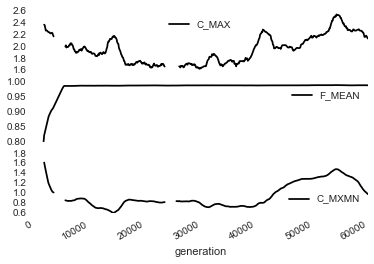

In [5]:
t1r1 = get_treat_rep(1, 1)
pd.rolling_mean(t1r1[['C_MAX', 'F_MEAN', 'C_MXMN']], 20).plot(subplots=True)

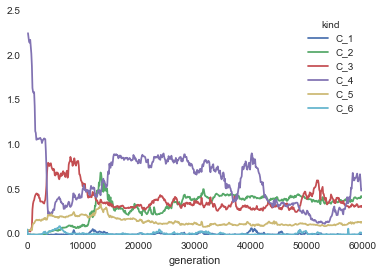

In [7]:
t1r1.plot(y=['C_%d' % (i+1) for i in range(6)])

In [91]:
nay = pd.read_sql_query('select treatment_id, replicate_id, kind, value from stats where generation = 60000 and kind in ("N_VAR", "C_MXMN")', conn, index_col=['treatment_id', 'replicate_id', 'kind'])
nay = nay.unstack(-1)
nay.columns = nay.columns.levels[1]
nay.reset_index(inplace=True)
nay.tail()

kind,treatment_id,replicate_id,C_MXMN,N_VAR
55,3,16,1.621172,0.018124
56,3,17,2.825073,0.024136
57,3,18,0.673801,0.011763
58,3,19,2.849068,0.023917
59,3,20,1.904286,0.021118


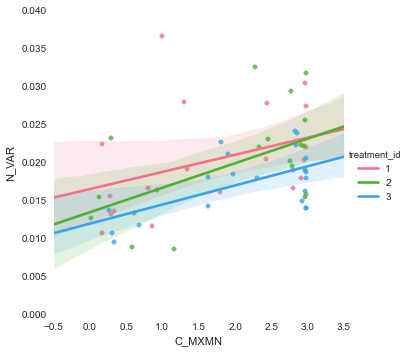

In [92]:
sb.lmplot(x="C_MXMN", y="N_VAR", data=nay, hue='treatment_id')

In [93]:
nay.corr()

kind,treatment_id,replicate_id,C_MXMN,N_VAR
kind,,,,
treatment_id,1.000000,0.000000,0.160557,-0.204520
replicate_id,0.000000,1.000000,-0.106139,0.238902
C_MXMN,0.160557,-0.106139,1.000000,0.434857
N_VAR,-0.204520,0.238902,0.434857,1.000000


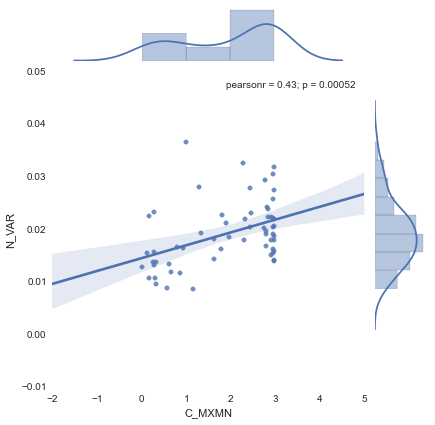

In [94]:
sb.jointplot(x="C_MXMN", y="N_VAR", data=nay, kind='reg')

In [95]:
from scipy.stats import kendalltau

In [97]:
print kendalltau(nay['N_VAR'], nay['C_MXMN'])

(0.24971751412429383, 0.0048166897110411312)
